Makine Öğrenimi ve Veri Biliminde , genellikle bir sınıftaki gözlemlerin diğer sınıflardan çok daha yüksek veya daha düşük olduğu durumlarda ortaya çıkan Dengesiz Veri Dağıtımı adlı bir terimle sık sık karşılaşırız. 

Makine Öğrenimi algoritmaları hatayı azaltarak doğruluğu artırma eğiliminde olduğundan sınıf dağılımını dikkate almazlar. Bu sorun, Dolandırıcılık Tespiti , Anormallik Tespiti , Yüz tanıma vb . örneklerde yaygındır .

Karar Ağacı ve Lojistik Regresyon gibi standart ML teknikleri çoğunluk sınıfına karşı bir önyargıya sahiptir ve azınlık sınıfını görmezden gelme eğilimindedir. 

Yalnızca çoğunluk sınıfını tahmin etme eğilimindedirler, dolayısıyla azınlık sınıfının çoğunluk sınıfına kıyasla büyük ölçüde yanlış sınıflandırılmasına sahiptirler. Daha teknik bir deyişle, veri kümemizde dengesiz veri dağılımı varsa, o zaman modelimiz azınlık sınıfının ihmal edilebilir veya çok daha az hatırlamaya sahip olduğu duruma daha yatkın hale gelir .

**Dengesiz Veri İşleme Teknikleri:**

 Dengesiz sınıf dağılımını işlemek için yaygın olarak kullanılan başlıca 2 algoritma vardır.

*SMOTE
*Near Miss Algoritması

##SMOTE (Sentetik Azınlık Aşırı Örnekleme Tekniği) – Aşırı Örnekleme
SMOTE (sentetik azınlık aşırı örnekleme tekniği), dengesizlik sorununu çözmek için en yaygın olarak kullanılan aşırı örnekleme yöntemlerinden biridir.

Azınlık sınıfı örneklerini çoğaltarak, rastgele artırarak sınıf dağılımını dengelemeyi amaçlar.

SMOTE, mevcut azınlık örnekleri arasında yeni azınlık örnekleri sentezler. Azınlık sınıfı için doğrusal enterpolasyon ile sanal eğitim kayıtları oluşturur 

Bu sentetik eğitim kayıtları, azınlık sınıfındaki her örnek için bir veya daha fazla k-en yakın komşunun rastgele seçilmesiyle oluşturulur. Aşırı örnekleme işleminden sonra veriler yeniden yapılandırılır ve işlenen veriler için çeşitli sınıflandırma modelleri uygulanabilir.

**SMOTE Algoritmasının nasıl çalıştığına dair Derin Görüş!**

* **Adım 1**: Azınlık sınıf kümesi A'nın ayarlanması , her biri için image.png' in k-en yakın komşuları, x ile küme A'daki diğer her örnek arasındaki Öklid uzaklığı hesaplanarak elde edilir .


**Adım 2:** Örnekleme oranı N , dengesiz orana göre ayarlanır. Her biri için image.png, k-en yakın komşularından image.png tane örnek (yani x1, x2, …xn) rastgele seçilir ve kümeyi oluştururlar .

**Adım 3:** Her örnek için image.png (k=1, 2, 3…N), yeni bir örnek oluşturmak için aşağıdaki formül kullanılır:


image.png
burada rand(0, 1) 0 ile 1 arasındaki rasgele sayıyı temsil eder.

##NearMiss Algoritması – Alt Örnekleme

NearMiss, yetersiz örnekleme tekniğidir. Çoğunluk sınıfı örneklerini rastgele ortadan kaldırarak sınıf dağılımını dengelemeyi amaçlar. İki farklı sınıfın örnekleri birbirine çok yakın olduğunda, iki sınıf arasındaki boşlukları artırmak için çoğunluk sınıfının örneklerini kaldırırız. Bu, sınıflandırma sürecinde yardımcı olur. Yetersiz örnekleme tekniklerinin çoğunda bilgi kaybı
sorununu önlemek için komşuya yakın yöntemler yaygın olarak kullanılmaktadır. Yakın komşu yöntemlerinin çalışmasıyla ilgili temel sezgi şu şekildedir:
* **Adım 1:** Yöntem önce çoğunluk sınıfının tüm örnekleri ile azınlık sınıfının örnekleri arasındaki mesafeleri bulur. Burada, çoğunluk sınıfı yetersiz örneklenmelidir.

* **Adım 2:** Ardından, azınlık sınıfındakilere en küçük mesafelere sahip çoğunluk sınıfının n örneği seçilir.

* **Adım 3:** Azınlık sınıfında k örnek varsa, en yakın yöntem çoğunluk sınıfının k*n örneğiyle sonuçlanacaktır.

**Çoğunluk sınıfında en yakın n örneği bulmak için, NearMiss Algoritmasını uygulamanın çeşitli varyasyonları vardır:**

1. **NearMiss – Sürüm 1:** Azınlık sınıfının en yakın k örneğine olan ortalama mesafelerin en küçük olduğu çoğunluk sınıfının örneklerini seçer .
2. **NearMiss – Sürüm 2:** Azınlık sınıfının en uzak k örneğine olan ortalama mesafelerin en küçük olduğu çoğunluk sınıfının örneklerini seçer .
3. **NearMiss – Sürüm 3:** 2 adımda çalışır. İlk olarak, her azınlık sınıfı örneği için, M en yakın komşusu depolanacaktır. Son olarak, N en yakın komşuya olan ortalama uzaklığın en büyük olduğu çoğunluk sınıfı örnekleri seçilir.

In [9]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.metrics import classification_report , confusion_matrix


In [ ]:
data = pd.read_csv('/content/creditcard.csv')
data.info()
data['Class'].value_counts()

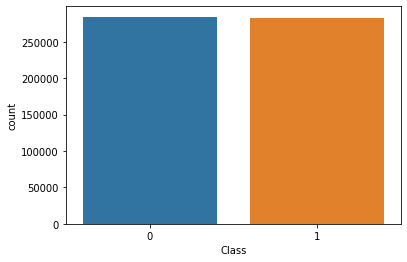

In [18]:
data_majority = data[(data['Class'] == 0)]
data_minority = data[(data['Class'] == 1)]

data_minority_upsampled = resample(data_minority, replace = True, n_samples= 282652, random_state = 99)
data_final = pd.concat([data_minority_upsampled, data_majority])

sns.countplot( x = data_final['Class'])


In [22]:
data_final_x = data_final.drop('Class', axis = 1)
data_final_y = data_final['Class']

x_train, x_test, y_train, y_test = train_test_split(data_final_x , data_final_y, test_size= 0.1, random_state = 99)

ss = StandardScaler()

x_train_f = ss.fit_transform(x_train)
x_test_f = ss.fit_transform(x_test)

pca =PCA()

x_train_f = pca.fit_transform(x_train)
x_test_f = pca.fit_transform(x_test)

In [25]:
print(f"x train shape : {x_train_f.shape}")
print(f"x test shape : {x_test_f.shape}")
print(f"y train shape : {y_train.shape}")
print(f"y test shape : {y_test.shape}")

x train shape : (510270, 30)
x test shape : (56697, 30)
y train shape : (510270,)
y test shape : (56697,)


In [34]:
model = XGBClassifier()
model.fit(x_train_f, y_train)
prediction = model.predict(x_test_f)

In [35]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     28681
           1       0.99      0.89      0.94     28016

    accuracy                           0.94     56697
   macro avg       0.94      0.94      0.94     56697
weighted avg       0.94      0.94      0.94     56697

